<a href="https://colab.research.google.com/github/yosaphatprs/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Minggu 7**

## Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

In [128]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## Konvolusi tanpa library

#### Membuat fungsi konvolusi
Fungsi Konvolusi yang dibuat memiliki parameter berupa:
1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. Nilai paddingg yagn akan ditambahkan pada citra

In [130]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

In [131]:
img = cv.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Menerapkan setiap filter yang telah ditentukan

#### Average Filter

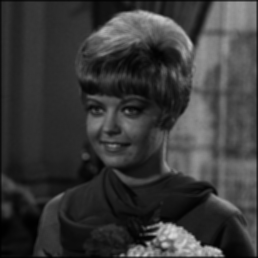

In [132]:
#average filter
kernel_average_filter = np.array([[1, 1, 1],
                                  [1, 1, 1],
                                  [1, 1, 1]])/9
cv2_imshow(convolution2d(img_gray, kernel_average_filter, 1, 2))

#### Low Pass Filter

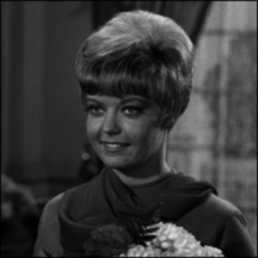

In [133]:
#low pass filter
kernel_low_pass_filter = np.array([[1, 1, 1],
                                   [1, 4, 1],
                                   [1, 1, 1]])/12
cv2_imshow(convolution2d(img_gray, kernel_low_pass_filter, 1, 2))

#### High pass filter

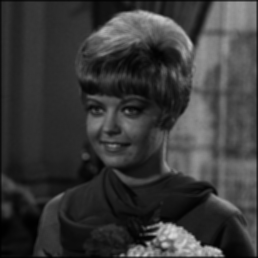

In [134]:
#high pass filter
kernel_high_pass_filter = np.array([[-1, 0, 1],
                                    [-1, 0, 3],
                                    [-3, 0, 1]])
cv2_imshow(convolution2d(img_gray, kernel_average_filter, 1, 2))

#### Sharpen

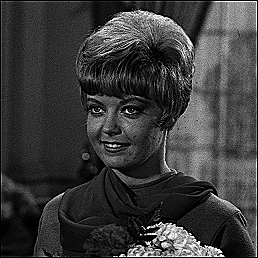

In [135]:
#image sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

#### Emboss

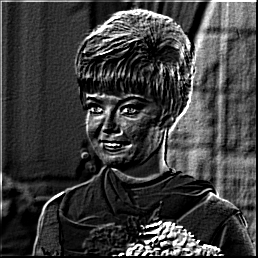

In [136]:
#image emboss
emboss = np.array([[-2, -1, 0],
                  [-1, 1, 1],
                  [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, emboss, 1, 2))

#### Left Sobel Edge Detection

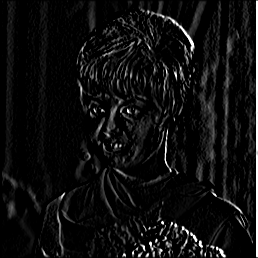

In [137]:
#left sobel edge detection
left_sobel_edge_detection = np.array([[1, 0, -1],
                                      [2, 0, -2],
                                      [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, left_sobel_edge_detection, 1, 2))

#### Canny Edge Detection

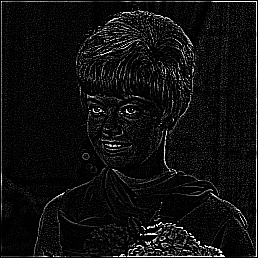

In [138]:
#canny edge detection
canny_edge_detection = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, canny_edge_detection, 1, 2))

#### Prewit Edge Detection

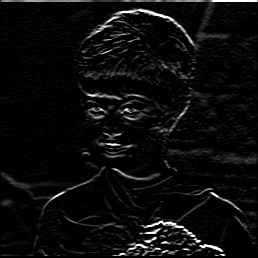

In [139]:
#prewitt edge detection
prewitt_edge_detection = np.array([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, prewitt_edge_detection, 1, 2))

#### 5x5 Gaussian Blur

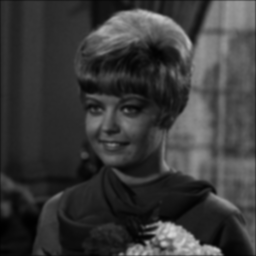

In [140]:
# 5x5 gaussian blur
gaussian_5 = np.array([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]])/256
cv2_imshow(convolution2d(img_gray, gaussian_5, 1, 2))

#### 21x21 Gaussian Blur

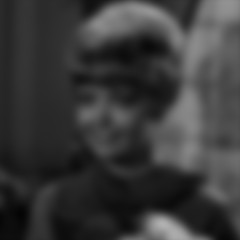

In [141]:
# 21x21 gaussian blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

## Tugas Praktikum

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

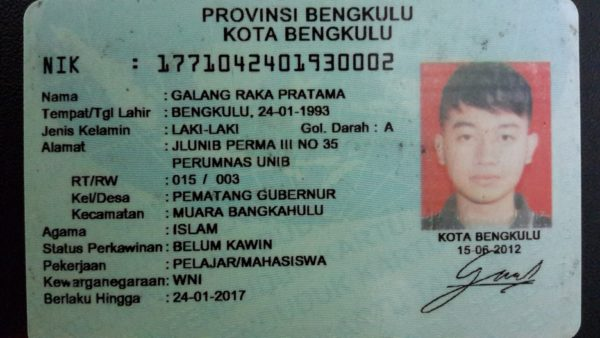

In [142]:
ktp_ori = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/KTP/ktp1.png')
cv2_imshow(ktp_ori)

#### Operasi Aritmatika (Gamma Correction)

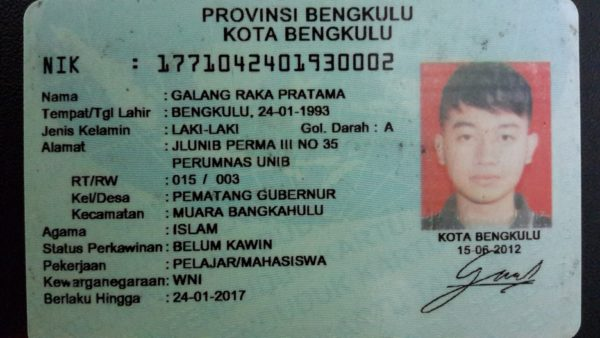

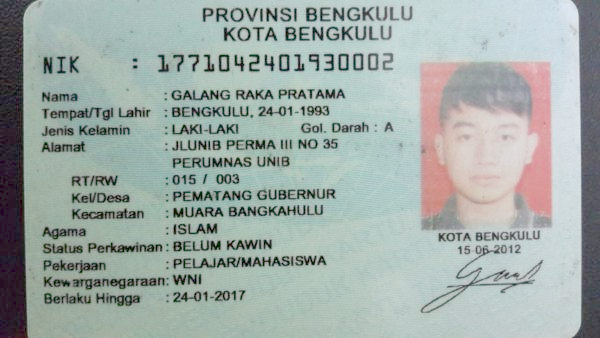

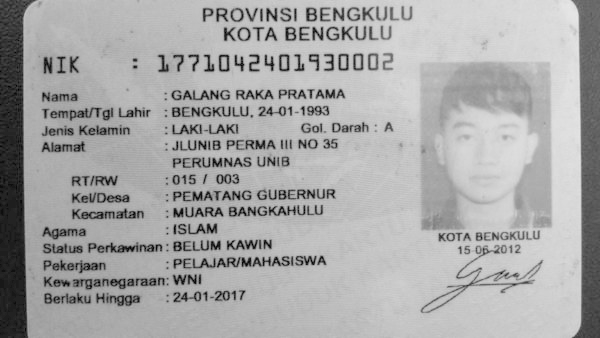

In [152]:
# Gamma Correction & Convert ke Grayscale
gamma_image = np.zeros(ktp_ori.shape, ktp_ori.dtype)
for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    for c in range(ktp_ori.shape[2]):
      gamma_image[y,x,c] = np.clip((255 * ((ktp_ori[y,x,c]/255)**(1/2))), 0, 255)

ktp_gray = cv.cvtColor(gamma_image, cv.COLOR_BGR2GRAY)
cv2_imshow(ktp_ori)
cv2_imshow(gamma_image)
cv2_imshow(ktp_gray)

#### Histogram Equalization

Berdasarkan hasil equalization di bawah, penggunaan Histogram Equalization tidak diperlukan karena hasil histogram equalization membuat citra menjadi tidak lebih baik.

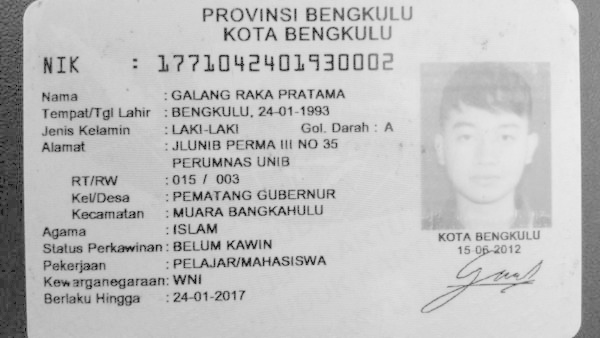

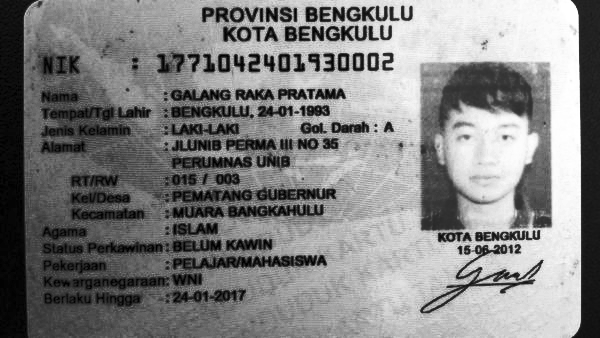

In [144]:
ktp_equalized = cv.equalizeHist(ktp_gray)
cv2_imshow(ktp_gray)
cv2_imshow(ktp_equalized)

#### Fungsi Konvolusi

In [145]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

#### Filterisasi

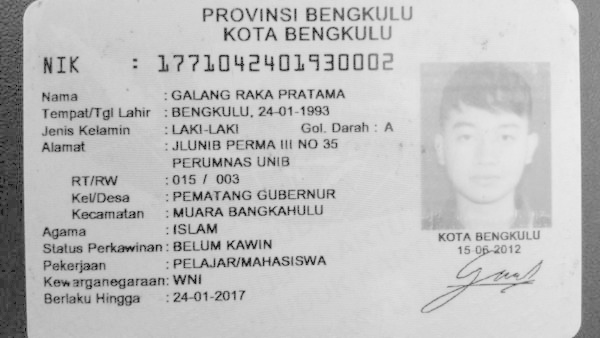

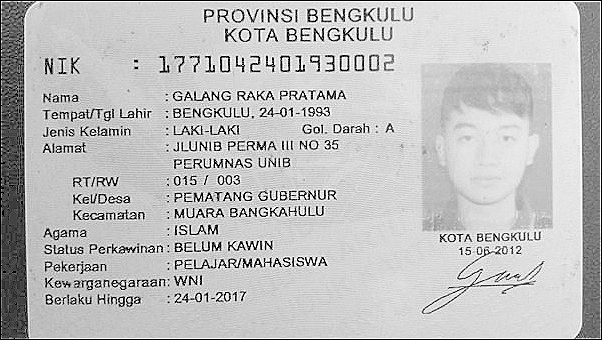

In [146]:
# Filterisasi (Sharpening Filter (Meningkatkan detail tulisan sehingga terlihat jelas perbedaan karakter huruf dengan background))
def sharpening_filter(gray_img):
    kernel_sharpening_filter = np.array([[0, -1, 0],
                                        [-1, 5, -1],
                                        [0, -1, 0]])
    sharp_filter_image = convolution2d(gray_img, kernel_sharpening_filter, 1, 2)
    return sharp_filter_image

sharp_filter_image = sharpening_filter(ktp_gray)
cv2_imshow(ktp_gray)
cv2_imshow(sharp_filter_image)

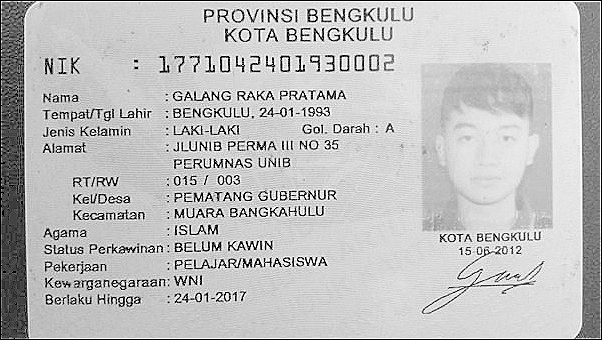

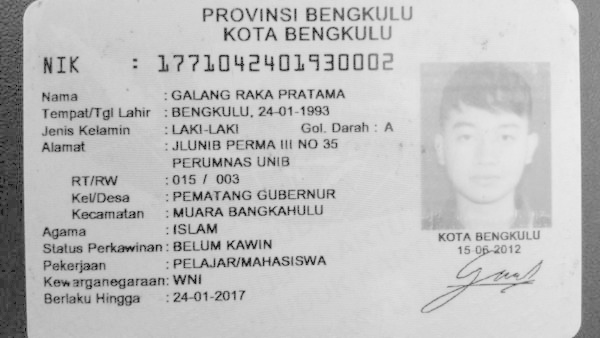

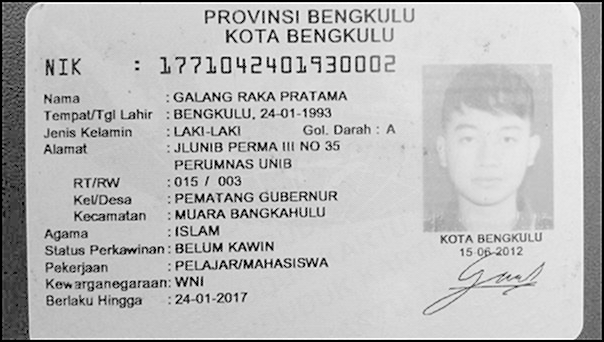

In [147]:
# Low Pass Filter (Mengurangi Noise dan Menghaluskan hasil Sharpening)
def low_pass_filter(gray_img):
    kernel_low_pass_filter = np.array([[1, 1, 1],
                                      [1, 4, 1],
                                      [1, 1, 1]])/12
    low_pass_image = convolution2d(gray_img, kernel_low_pass_filter, 1, 2)
    return low_pass_image

low_filter_image = low_pass_filter(sharp_filter_image)
# Atas Sharpening
cv2_imshow(sharp_filter_image)
# Tengah Original
cv2_imshow(ktp_gray)
# Bawah Hasil Filterisasi
cv2_imshow(low_filter_image)

#### Edge Detection

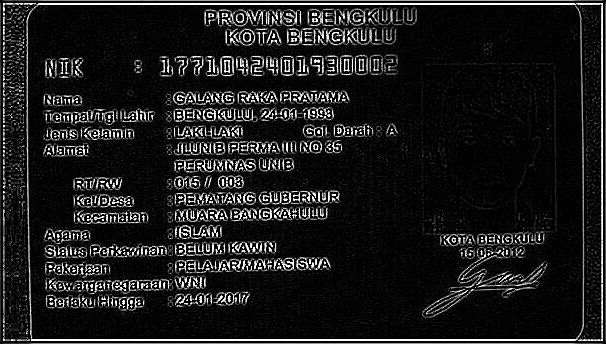

In [150]:
# Canny Edge Detection
canny_edge_detection = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])
canny_image = convolution2d(low_filter_image, canny_edge_detection, 1, 2)
cv2_imshow(canny_image)